# Финальный проект. 
# Космический корабль Титаник.

### Задание для финального проекта

Предсказать, какие пассажиры переместятся в другое измерение

Добро пожаловать в 2912 год, когда ваши навыки работы с данными необходимы для решения космической тайны. Мы получили передачу с расстояния в четыре световых года, и все выглядит не очень хорошо.

Космический корабль «Титаник» — межзвездный пассажирский лайнер, запущенный месяц назад. С почти 13 000 пассажиров на борту судно отправилось в свой первый рейс, доставив эмигрантов из нашей Солнечной системы к трем новым обитаемым экзопланетам, вращающимся вокруг ближайших звезд.

Обогнув Альфу Центавра по пути к своему первому пункту назначения — жаркому 55 Cancri E — неосторожный космический корабль «Титаник» столкнулся с пространственно-временной аномалией, скрытой в пылевом облаке. К сожалению, его постигла та же участь, что и его тезку 1000 лет назад. Хотя корабль остался цел, почти половина пассажиров была перенесена в другое измерение!

Чтобы помочь спасательным экипажам и вернуть потерянных пассажиров, вам предстоит предсказать, какие пассажиры были перевезены аномалией, используя записи, восстановленные из поврежденной компьютерной системы космического корабля.

Помогите сохранить их и изменить историю!

**Содержание**
* [Загрузка данных](#load)
* [1. EDA](#eda)
    * [1.1. Распределение целевой переменной](#target)
    * [1.2. Анализ признаков](#features)
        * [1.2.1 Количественные признаки](#num_features)
        * [1.2.2 Категориальные признаки](#cat_features)
        * [1.2.3 Бинарные признаки](#binary_features)
        * [1.2.4 Матрица корреляций](#corr)
    * [1.3. Анализ зависимости таргета от фичей](#target_features)
        * [1.3.1 Количественные признаки](#num_features_target)
        * [1.3.2 Категориальные / бинарные признаки](#cat_bin_features)
* [2. Обработка выбросов](#outlier)
* [3. Обработка пропусков](#nan)
* [4. Построение новых признаков](#feature)
* [5. Отбор признаков](#feature_selection)
* [6. Разбиение на train и test](#split)
* [7. Построение модели](#modeling)
* [8. Прогнозирование на тестовом датасете](#prediction)

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [4]:
# https://www.kaggle.com/competitions/spaceship-titanic/data/

TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

### Загрузка данных <a class='anchor' id='load'>

**Описание датасета**

* **PassengerId** - Уникальный идентификатор для каждого пассажира. Каждый идентификатор принимает форму *gggg_pp*, где *gggg* указывает группу, с которой путешествует пассажир, и *pp* является их номером в группе. Люди в группе часто являются членами семьи, но не всегда.
* **HomePlanet** - Планета, с которой вылетел пассажир, как правило, планета его постоянного проживания.
* **CryoSleep** - Указывает, решил ли пассажир быть переведен в режим анабиоза на время рейса. Пассажиры, находящиеся в криосонном состоянии, находятся в своих каютах.
* **Cabin** - Номер каюты, в которой находится пассажир. Принимает вид *deck/num/side*, где *side* может быть либо *P* за левый , либо *S* за правый борт .
* **Destination** - Планета, на которую будет высаживаться пассажир.
* **Age** - Возраст пассажира.
* **VIP** - Оплатил ли пассажир специальное VIP-обслуживание во время рейса.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Сумма, которую пассажир выставил в счет за каждое из многочисленных роскошных удобств космического корабля Титаник .
* **Name** - Имя и фамилия пассажира.
* **Transported** - Был ли пассажир перенесён в другое измерение. Это цель, столбец, который мы пытаемся предсказать.

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [6]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [8]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 8693
Строк в тесте 4277


In [9]:
train_df.shape[1] - 1 == test_df.shape[1]

True

### Приведение типов

In [10]:
# PassengerId

passenger_id = pd.DataFrame(train_df['PassengerId'].dropna().apply(lambda x: x.split('_')).tolist(), 
                     index=train_df['PassengerId'].dropna().index, columns=['GroupId', 'PassengerIdInGroup'])
passenger_id = passenger_id.astype(int)
passenger_id.head(3)

,GroupId,PassengerIdInGroup
0,1,1
1,2,1
2,3,1


In [11]:
# Cabin

cabin = pd.DataFrame(train_df['Cabin'].dropna().apply(lambda x: x.split('/')).tolist(), 
                     index=train_df['Cabin'].dropna().index, columns=['CabinDeck', 'CabinNum', 'CabinSide'])
cabin['CabinNum'] = cabin['CabinNum'].astype(int)
cabin.head(3)

,CabinDeck,CabinNum,CabinSide
0,B,0,P
1,F,0,S
2,A,0,S


In [12]:
# Name
train_df['FirstName'] = train_df['Name'].dropna().apply(lambda x: x.split()[0])
train_df['LastName'] = train_df['Name'].dropna().apply(lambda x: x.split()[1])

In [13]:
train_df = pd.concat([train_df, passenger_id, cabin], axis=1).drop(columns=['PassengerId', 'Cabin', 'Name'])

train_df = train_df[['GroupId', 'PassengerIdInGroup', 'HomePlanet', 'CryoSleep', 'CabinDeck', 
                     'CabinNum', 'CabinSide', 'Destination', 'Age', 'VIP', 'RoomService',
                     'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'FirstName', 'LastName',
                     'Transported']]
train_df.head()

,GroupId,PassengerIdInGroup,HomePlanet,CryoSleep,CabinDeck,CabinNum,CabinSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,FirstName,LastName,Transported
0,1,1,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham,Ofracculy,False
1,2,1,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,Vines,True
2,3,1,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,Susent,False
3,3,2,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,Susent,False
4,4,1,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy,Santantines,True


## 1. EDA  <a class='anchor' id='eda'>

### 1.1 Распределение целевой переменной<a class='anchor' id='target'>

Целевая переменая распределена на две равные части.

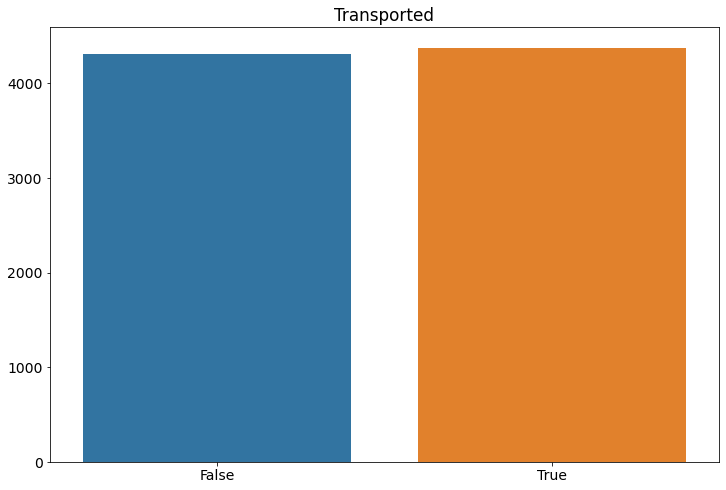

In [14]:
counts = train_df['Transported'].value_counts()
    
plt.figure(figsize=(12, 8))    
plt.title('Transported')
sns.barplot(counts.index, counts.values)
    
plt.show()

### 1.2 Анализ признаков<a class='anchor' id='features'>

#### 1.2.1 Количественные признаки<a class='anchor' id='num_features'>

**Количество групп по рамерам группы**

Большинство пассажиров отправились в путешествие самостоятельно.

Так же на борту присутствуют некоторые группы, число которых уменьшается пропорционально росту численности группы, с максимальным значением в 8 пассажиров.



In [15]:
groups = train_df\
    .groupby('GroupId', as_index=False)['PassengerIdInGroup'].count()\
    .groupby('PassengerIdInGroup', as_index=False)['GroupId'].count()\
    .rename(columns={'PassengerIdInGroup': 'GroupSize_', 'GroupId': 'NumberOfGroups'})

print(f"Максимальный размер группы: - {groups['GroupSize_'].max()} пассажиров")

groups['GroupSize'] = groups['GroupSize_'].apply(lambda x: x if x < 5 else '> 4')
groups = groups.groupby('GroupSize', as_index=False)['NumberOfGroups'].sum()
groups

Максимальный размер группы: - 8 пассажиров


,GroupSize,NumberOfGroups
0,1,4805
1,2,841
2,3,340
3,4,103
4,> 4,128


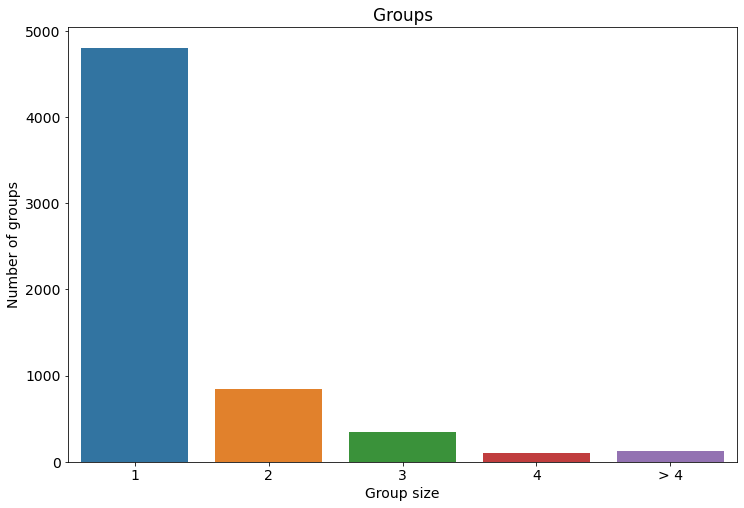

In [16]:
plt.figure(figsize=(12, 8))    
plt.title('Groups')
ax = sns.barplot(groups['GroupSize'], groups['NumberOfGroups'])
ax.set(xlabel='Group size', ylabel='Number of groups')    
plt.show()

**Service**

42% пассажиров услугами сервисов на борту не пользовались.

Большинство оставшихся пассажиров тратили до 2000.

In [17]:
df_service = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
df_service.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [18]:
(df_service.sum(axis=1) > 0).value_counts(normalize=True)

True     0.579777
False    0.420223
dtype: float64

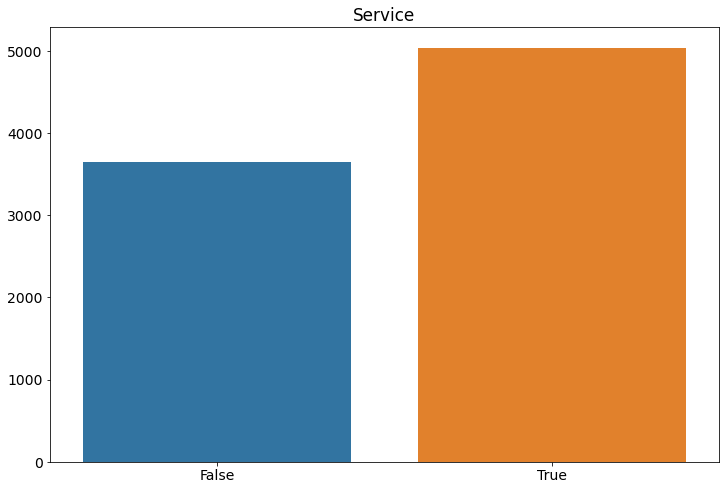

In [19]:
counts = (df_service.sum(axis=1) > 0).value_counts()   
plt.figure(figsize=(12, 8))    
plt.title('Service')
sns.barplot(counts.index, counts.values)
plt.show()

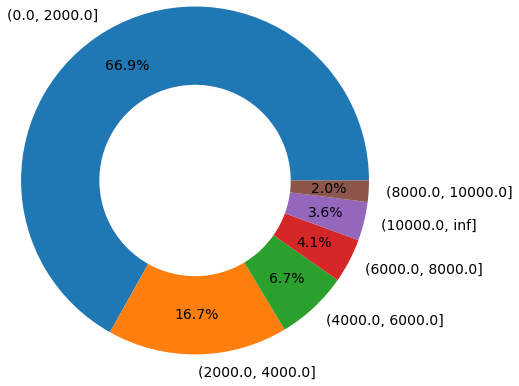

In [20]:
money = pd.cut(df_service.sum(axis=1), bins=np.append(np.arange(0, 10001, 2000), np.inf)).value_counts()
fig, ax = plt.subplots()
# ax.title.set_text('Service')
ax.pie(money, labels=money.index, radius=2, wedgeprops=dict(width=0.9), autopct='%2.1f%%', pctdistance=0.77);

**Возраст**

Большинство пассажиров средних лет.

Так же на борту не малая доля малолетних детей.

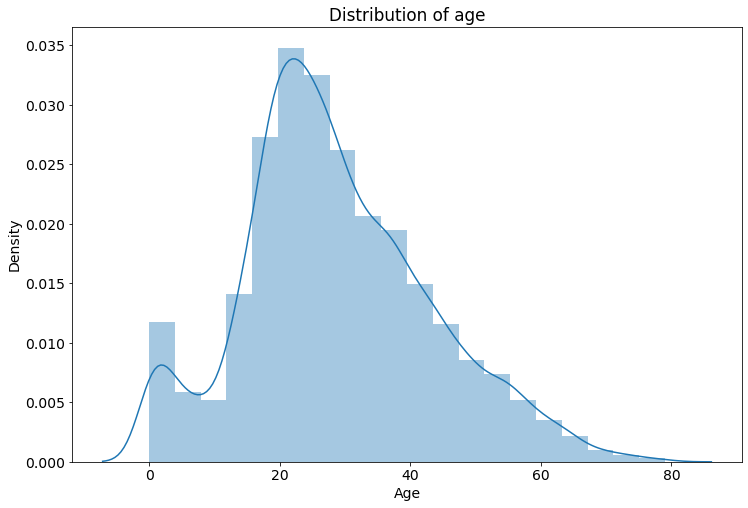

In [21]:
plt.figure(figsize = (12, 8))
sns.distplot(train_df['Age'], bins=20)
plt.title('Distribution of age');

#### 1.2.2 Категориальные признаки<a class='anchor' id='cat_features'>

**Откуда и куда летят пассажиры**

Половина пассажиров (54.2%) отпавились в путешествие с планеты "Earth" ("Земля").

Остальные же присоединились к путешествию с планет "Europa" (25.1%) и "Mars"(20.7%)

In [22]:
# HomePlanet
home_planet = train_df.groupby('HomePlanet', as_index=False)['Transported'].count()\
                      .rename(columns={'Transported': 'From'})
home_planet

,HomePlanet,From
0,Earth,4602
1,Europa,2131
2,Mars,1759


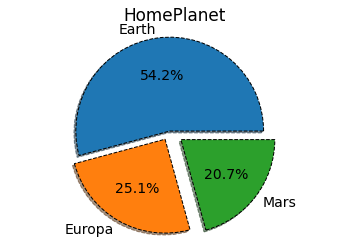

In [23]:
vals = home_planet['From']
labels = home_planet['HomePlanet']
explode = (0, 0.1, 0.15)
fig, ax = plt.subplots()
ax.title.set_text('HomePlanet')
ax.pie(vals, 
       labels=labels, 
       autopct='%1.1f%%', 
       shadow=True, 
       explode=explode, 
       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"},
#        rotatelabels=True
      )
ax.axis("equal");

In [24]:
# Destination
destination = train_df.groupby('Destination', as_index=False)['Transported'].count()\
                      .rename(columns={'Transported': 'To'})
destination

,Destination,To
0,55 Cancri e,1800
1,PSO J318.5-22,796
2,TRAPPIST-1e,5915


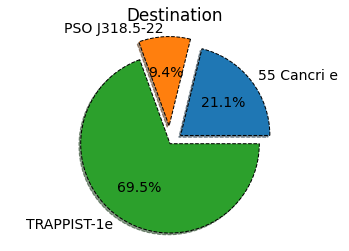

In [25]:
vals = destination['To']
labels = destination['Destination']
explode = (0.15, 0.2, 0)
fig, ax = plt.subplots()
ax.title.set_text('Destination')
ax.pie(vals, 
       labels=labels, 
       autopct='%1.1f%%', 
       shadow=True, 
       explode=explode, 
       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"},
#        rotatelabels=True
      )
ax.axis("equal");

**Размеры палуб**

Большинство кают расположено на палубах "G" и "F".

На палубе "T" лишь 5 кают. Возможно они предназначены для командного состава коробля.

In [26]:
cabin_deck = train_df.groupby('CabinDeck', as_index=False)['Transported'].count()\
                     .rename(columns={'Transported': 'NumberOfPassengers'})
cabin_deck

,CabinDeck,NumberOfPassengers
0,A,256
1,B,779
2,C,747
3,D,478
4,E,876
5,F,2794
6,G,2559
7,T,5


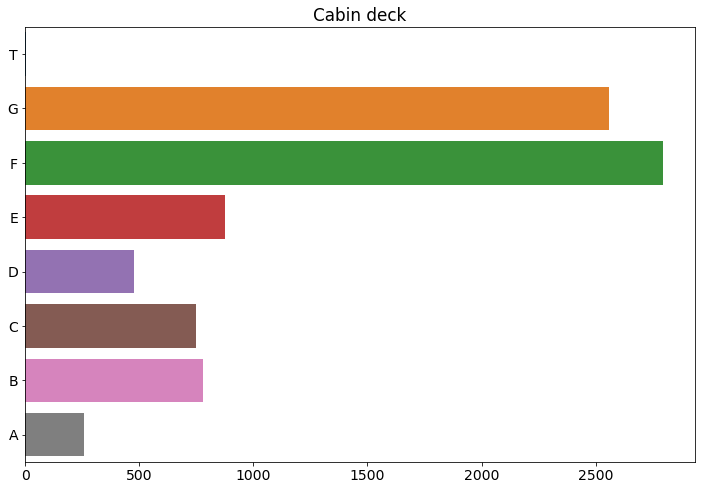

In [27]:
counts = train_df['CabinDeck'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(12, 8))    
plt.title('Cabin deck')
sns.barplot(counts.values, counts.index)
    
plt.show()

<!-- от куда и куда летят пассажиры Титаника -->

**Родство**

Большинство пассажиров путешествует семьями (или имеют на борту однофамильцев).

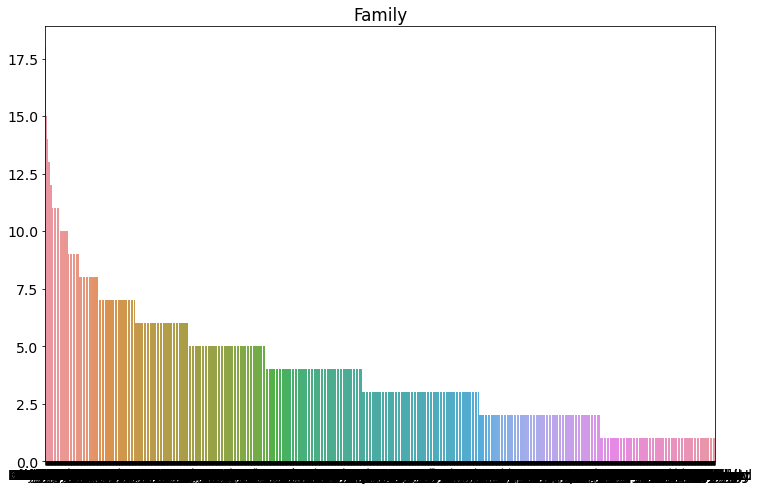

In [28]:
counts = train_df['LastName'].value_counts()
    
plt.figure(figsize=(12, 8))    
plt.title('Family')
sns.barplot(counts.index, counts.values)
    
plt.show()

#### 1.2.3 Бинарные признаки<a class='anchor' id='binary_features'>

**Распределение крио сна** 

Во время путешествия, треть пассажиров карабля, находились в состоянии крио сна.

In [29]:
train_df['CryoSleep'].value_counts(normalize=True)

False    0.641694
True     0.358306
Name: CryoSleep, dtype: float64

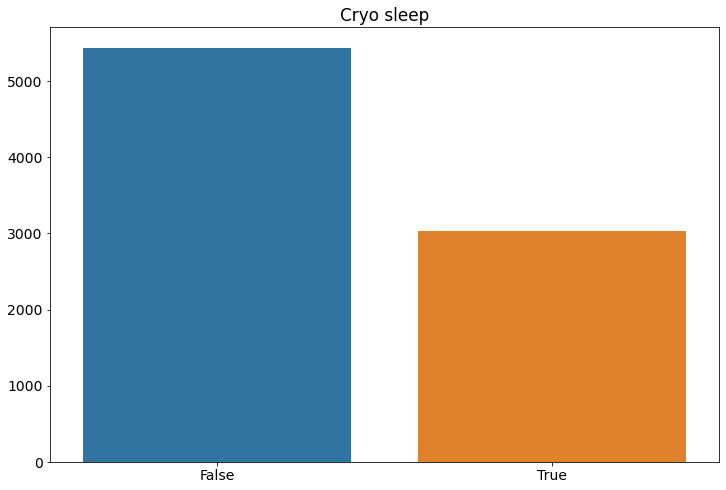

In [30]:
counts = train_df['CryoSleep'].value_counts()
    
plt.figure(figsize=(12, 8))    
plt.title('Cryo sleep')
sns.barplot(counts.index, counts.values)
    
plt.show()

**Распределение пассажиров с VIP статусом** 

Незначительная доля пассажиров (2.3%) имеет VIP статус.

In [31]:
train_df['VIP'].value_counts(normalize=True)

False    0.976561
True     0.023439
Name: VIP, dtype: float64

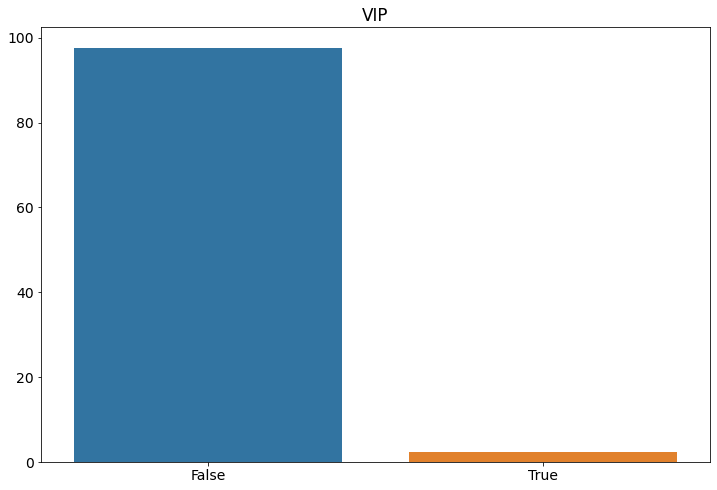

In [32]:
counts = train_df['VIP'].value_counts(normalize=True)
    
plt.figure(figsize=(12, 8))    
plt.title('VIP')
sns.barplot(counts.index, counts.values * 100)
    
plt.show()

#### 1.2.4 Матрица корреляций<a class='anchor' id='corr'>

Линейная взамосвязь между признаками не обнаружена, за исключением номера группы "GroupId" и номера каюты "CabinNum", которая не имеет большого значения.

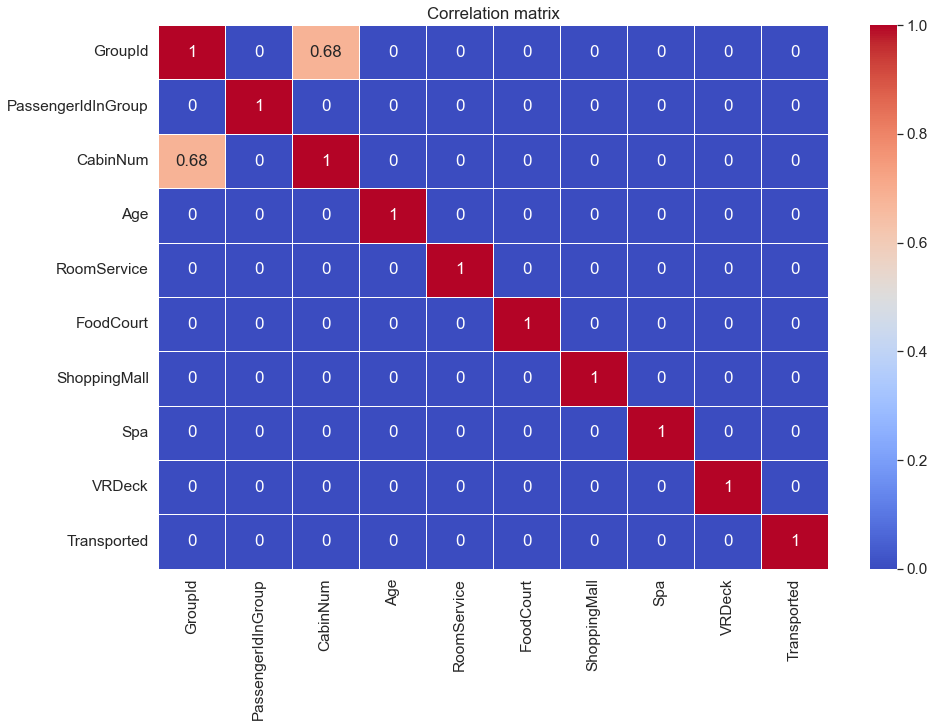

In [33]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

### 1.3. Анализ зависимости таргета от фичей<a class='anchor' id='target_features'>

#### 1.3.1 Количественные признаки<a class='anchor' id='num_features_target'>

**Доля транспортируемых пассажиров по размеру группы**

In [34]:
# size_group
size_group = train_df.groupby('GroupId')['PassengerIdInGroup'].max().reset_index()\
    .rename(columns={'PassengerIdInGroup': 'GroupSize'})
train_df = train_df.merge(size_group, how='left', on='GroupId')

In [35]:
# share_of_transported_by_size_group
group_id = train_df.groupby('GroupId')[['PassengerIdInGroup', 'Transported']]\
    .agg({'PassengerIdInGroup': 'max', 'Transported': 'sum'})\
    .groupby('PassengerIdInGroup')['Transported'].mean()\
    .reset_index()\
    .rename(columns={'PassengerIdInGroup': 'GroupSize', 'Transported': 'ShareOfTransported'})
group_id['ShareOfTransportedBySizeGroup'] = group_id['ShareOfTransported'] / group_id['GroupSize']
group_id.drop(columns=['ShareOfTransported'], inplace=True)
group_id

,GroupSize,ShareOfTransportedBySizeGroup
0,1,0.452445
1,2,0.538050
2,3,0.593137
3,4,0.640777
4,5,0.592453
5,6,0.614943
6,7,0.541126
7,8,0.394231


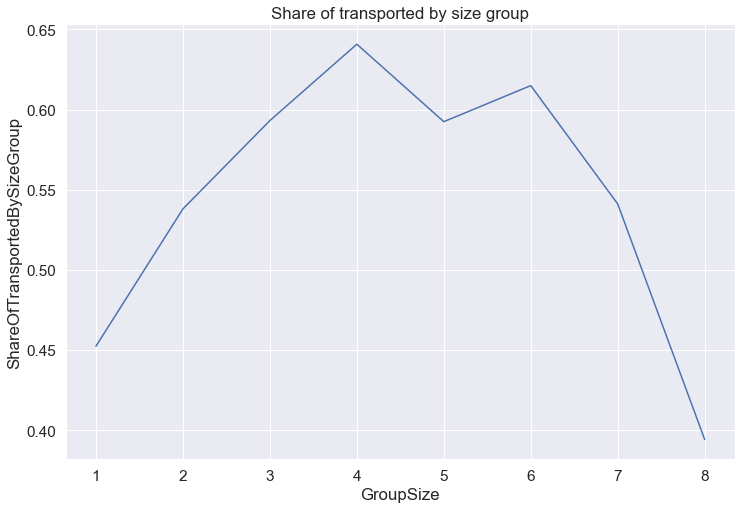

In [36]:
plt.figure(figsize=(12, 8))    
plt.title('Share of transported by size group')
sns.lineplot(group_id['GroupSize'], group_id['ShareOfTransportedBySizeGroup'])
plt.show()

Шанс остаться на карабле выше у групп с численностью от 3 до 6 человек. 

Возможно это следствие взаимовыручки внутри коллектива.
Малые шансы у одноких пассажиров объястняются тем, что в трудный момент им некому помочь.
Малые шансы у больших групп - возможно это влияние хауса в большом коллективе.

**Доля транспортируемых пассажиров по возрастным группы**

In [37]:
age = pd.DataFrame(
    pd.cut(
        train_df['Age'], 
        bins=[0, 6, 12, 18, 45, 60, 75, float('inf')],
        labels=['Малолетние', 'Дети', 'Подростки', 'Молодые', 'Средний', 'Пожилой', 'Старый']
        ))\
    .join(train_df['Transported'])\
    .groupby('Age')['Age', 'Transported'].agg({'Age': 'count', 'Transported': 'sum'})
pd.DataFrame(age['Transported'] / age['Age'], columns = ['ShareOfTransported'])

,ShareOfTransported
Age,
Малолетние,0.711911
Дети,0.610487
Подростки,0.537299
Молодые,0.471626
Средний,0.491944
Пожилой,0.480952
Старый,0.300000


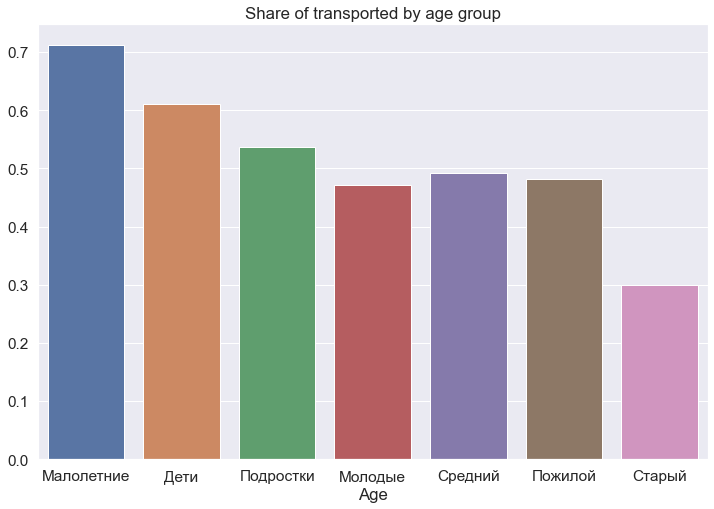

In [38]:
counts = age['Transported'] / age['Age']

plt.figure(figsize=(12, 8))    
plt.title('Share of transported by age group')
sns.barplot(counts.index, counts.values)
    
plt.show()

БОльшая вероятность покинуть корабль у малолетних детей. С возрастом этот показатель падает до средних значений.

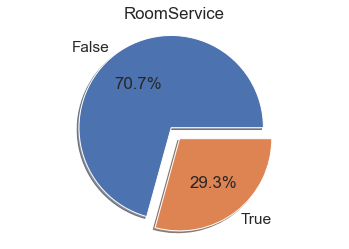

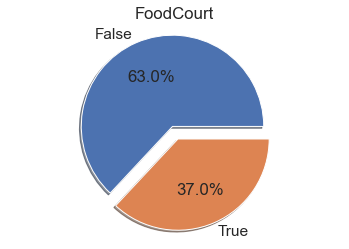

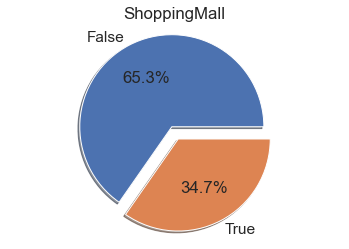

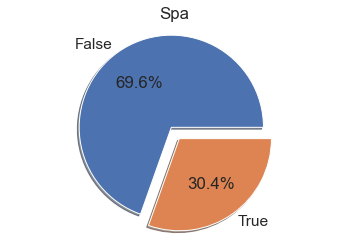

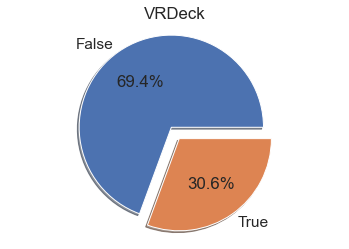

In [39]:
servise_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in servise_list:
    x = pd.DataFrame(train_df[col].apply(lambda x: x > 0)).join(train_df['Transported'])\
        .groupby(col)[col, 'Transported'].agg({col: 'count', 'Transported': 'sum'}).rename(columns={col: 'Count'})
    vals = x['Transported'] / x['Count']
    labels = x.index
    explode = (0, 0.15)
    fig, ax = plt.subplots()
    ax.title.set_text(col)
    ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
    ax.axis("equal");

Около трети пассажиров пользовавшихся одним из севисов на борту пропали с карабля.

#### 3.2 Категориальные / бинарные признаки<a class='anchor' id='cat_bin_features'>

**Доля транспортируемых пассажиров по родной планете**

In [40]:
#  share_of_transported_by_home_planet
home_planet = train_df.groupby('HomePlanet')[['GroupSize', 'Transported']]\
    .agg({'GroupSize': 'count', 'Transported': 'sum'})\
    .reset_index()\
    .rename(columns={'GroupSize': 'SizeHomePlanet', 'Transported': 'ShareOfTransported'})
home_planet['ShareOfTransportedByHomePlanet'] = home_planet['ShareOfTransported'] / home_planet['SizeHomePlanet']
home_planet.drop(columns=['SizeHomePlanet', 'ShareOfTransported'], inplace=True)
home_planet

,HomePlanet,ShareOfTransportedByHomePlanet
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


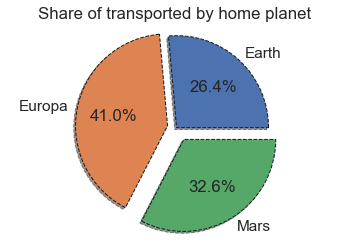

In [41]:
vals = home_planet['ShareOfTransportedByHomePlanet']
labels = home_planet['HomePlanet']
explode = (0, 0.1, 0.15)
fig, ax = plt.subplots()
ax.title.set_text('Share of transported by home planet')
ax.pie(vals, 
       labels=labels, 
       autopct='%1.1f%%', 
       shadow=True, 
       explode=explode, 
       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"},
#        rotatelabels=True
      )
ax.axis("equal");

**Доля транспортируемых пассажиров по пункту назначения**

In [42]:
#  share_of_transported_by_destination
destination = train_df.groupby('Destination')[['GroupSize', 'Transported']]\
    .agg({'GroupSize': 'count', 'Transported': 'sum'})\
    .reset_index()\
    .rename(columns={'GroupSize': 'SizeDestination', 'Transported': 'ShareOfTransported'})
destination['ShareOfTransportedByDestination'] = destination['ShareOfTransported'] / destination['SizeDestination']
destination.drop(columns=['SizeDestination', 'ShareOfTransported'], inplace=True)
destination

,Destination,ShareOfTransportedByDestination
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


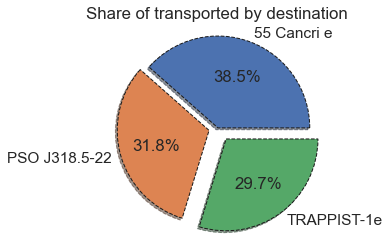

In [43]:
vals = destination['ShareOfTransportedByDestination']
labels = destination['Destination']
explode = (0, 0.1, 0.15)
fig, ax = plt.subplots()
ax.title.set_text('Share of transported by destination')
ax.pie(vals, 
       labels=labels, 
       autopct='%1.1f%%', 
       shadow=True, 
       explode=explode, 
       wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"},
#        rotatelabels=True
      )
ax.axis("equal");

**Доля транспортируемых пассажиров по размерам семьи**

In [44]:
# share_of_transported_by_size_family
family = train_df.groupby('LastName')[['LastName', 'Transported']]\
    .agg({'LastName': 'count', 'Transported': 'sum'})\
    .rename(columns={'LastName': 'SizeFamily', 'Transported': 'CountTransported'})\
    .groupby('SizeFamily', as_index=False)['CountTransported'].mean()   
family['ShareOfTransportedBySizeFamily'] = family['CountTransported'] / family['SizeFamily']
family.drop(columns=['CountTransported'], inplace=True)
family

,SizeFamily,ShareOfTransportedBySizeFamily
0,1,0.583770
1,2,0.493750
2,3,0.534364
3,4,0.503906
4,5,0.509375
5,6,0.499037
6,7,0.481393
7,8,0.454044
8,9,0.482540
9,10,0.510000


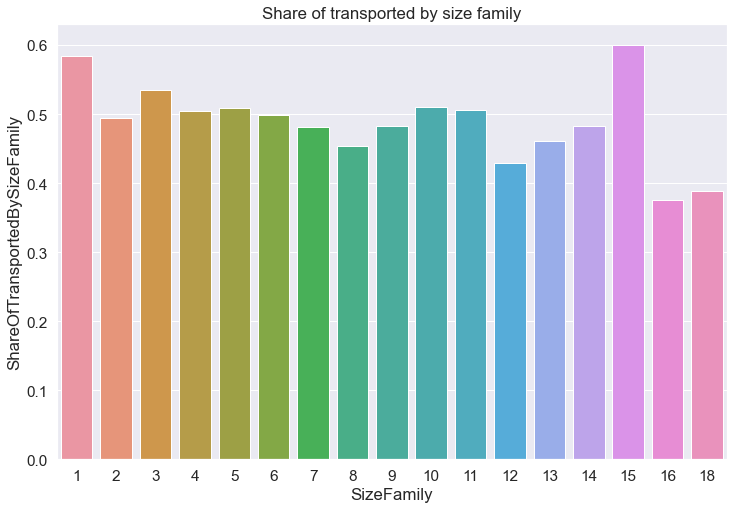

In [45]:
plt.figure(figsize=(12, 8))    
plt.title('Share of transported by size family')
sns.barplot(family['SizeFamily'], family['ShareOfTransportedBySizeFamily'])  
plt.show()

Большое влияние численность семьи на долю перемещенных пассажиров не оказывает.

**Доля транспортируемых пассажиров по CryoSleep**

In [46]:
creo_sleep = train_df.groupby('CryoSleep')['CryoSleep', 'Transported'].agg({'CryoSleep': 'count', 'Transported': 'sum'})\
    .rename(columns={'CryoSleep': 'SizeCryoSleepGroup', 'Transported': 'CountTransported'})
creo_sleep

,SizeCryoSleepGroup,CountTransported
CryoSleep,,
False,5439,1789
True,3037,2483


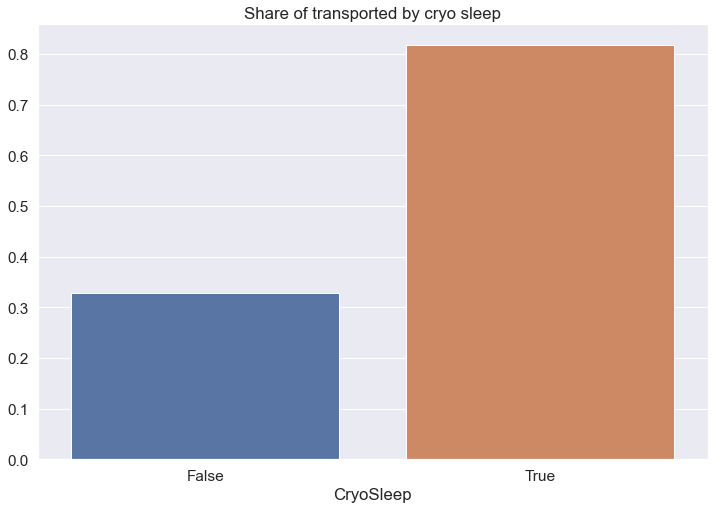

In [47]:
counts = creo_sleep['CountTransported'] / creo_sleep['SizeCryoSleepGroup']
plt.figure(figsize=(12, 8))    
plt.title('Share of transported by cryo sleep')
sns.barplot(creo_sleep.index, counts.values)    
plt.show()

Лишь треть бодрствующих пассажиров былы перенесена. Большинство пасажиро введенных в криосон покинули корабль. 

**Доля транспортируемых пассажиров по VIP статусу**

In [48]:
vip = train_df.groupby('VIP')['VIP', 'Transported'].agg({'VIP': 'count', 'Transported': 'sum'})\
    .rename(columns={'VIP': 'SizeVIPGroup', 'Transported': 'CountTransported'})
vip

,SizeVIPGroup,CountTransported
VIP,,
False,8291,4198
True,199,76


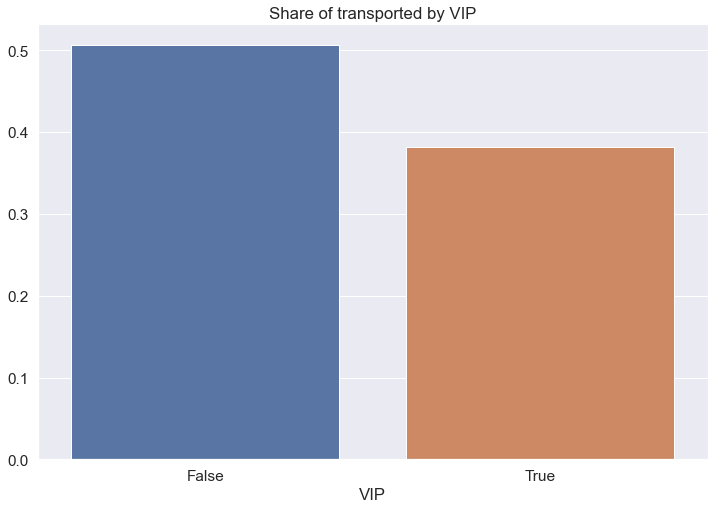

In [49]:
counts = vip['CountTransported'] / vip['SizeVIPGroup']
plt.figure(figsize=(12, 8))    
plt.title('Share of transported by VIP')
sns.barplot(vip.index, counts.values)    
plt.show()

Наличие VIP статуса уменьшае шанс быть перемещенным до 38%